## STATIONARITY CHECK 1

In [ ]:
#Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

Text(0, 0.5, 'Flux')

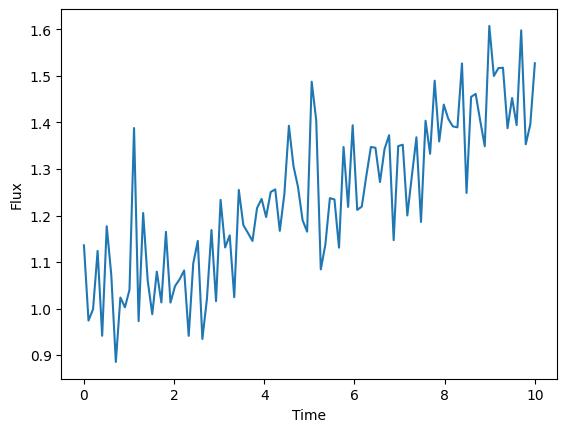

In [ ]:
# Load the time series data from the file, ignoring lines starting with '!' (comments in the file).
data1= np.genfromtxt('/stationarity_check edited 1.txt',comments='!')
x,y = data1[:,0],data1[:,1]    # Extracting the first column as the time variable (x) and the second column as the flux (y).
plt.plot(x,y) # Visualizing the variation of flux over time.
plt.xlabel('Time')
plt.ylabel('Flux')

### Calculating mean and standard deviation

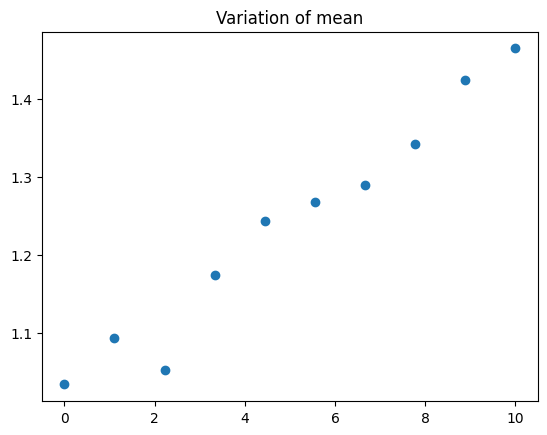

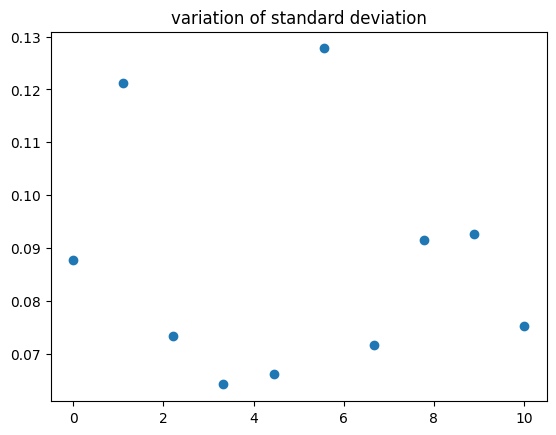

In [ ]:
# Divide the data (y) into 10 equal segments.
f = np.array_split(y,10)   

# For each segment, compute the mean and standard deviation:
mu_=[]              #mean
sigma_=[]           #standard_deviation
for i in f:
  mu = np.mean(i)
  mu_.append(mu)
  sigma = np.std(i)
  sigma_.append(sigma)


# analyzing how these statistics change over different parts of the data.
x1 = np.linspace(0,10,10)
plt.scatter(x1,mu_,)
plt.title('Variation of mean')
plt.show()
plt.scatter(x1,sigma_)
plt.title('variation of standard deviation')
plt.show()

### Curve fitting

In [ ]:
# Define a straight-line function `strfn` with parameters slope (m) and intercept (c).

def strfn(x,m,c):
  return m*x+c

# Use `curve_fit` to fit the function to the data (x, y) and estimate the best-fit values of m and c.
params,cov = curve_fit(strfn,x,y)

print(params)   
# The `params` array contains the optimized values of m and c, which are printed for verification.

[0.04771938 0.99960359]


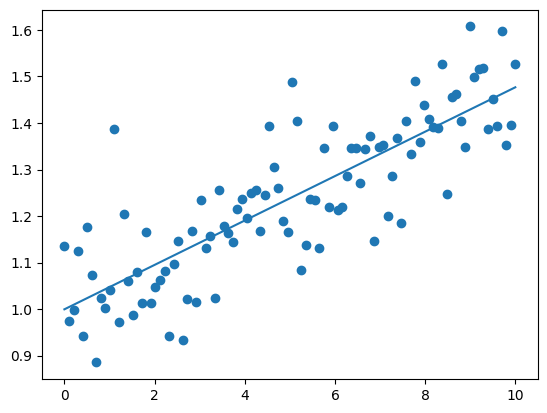

In [ ]:
# Overlaying the best-fit line (`fn`) on the scatter plot to visualize the fit.

fn = strfn(x,params[0],params[1])
plt.scatter(x,y)
plt.plot(x,fn)


### First order differencing

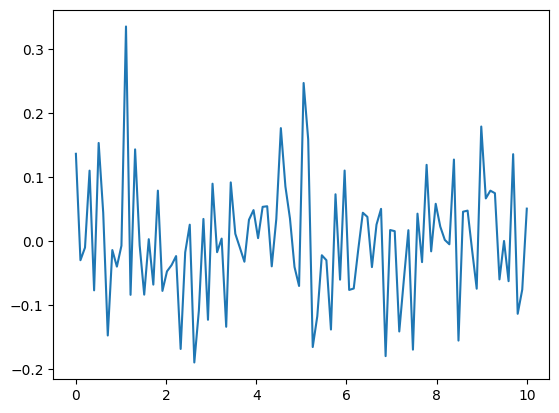

In [ ]:
res = y - fn
plt.plot(x,res)

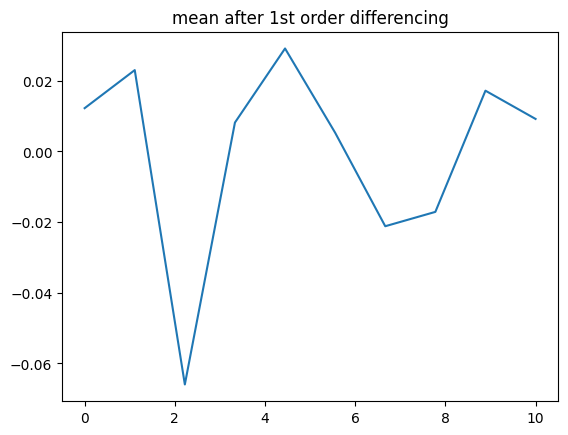

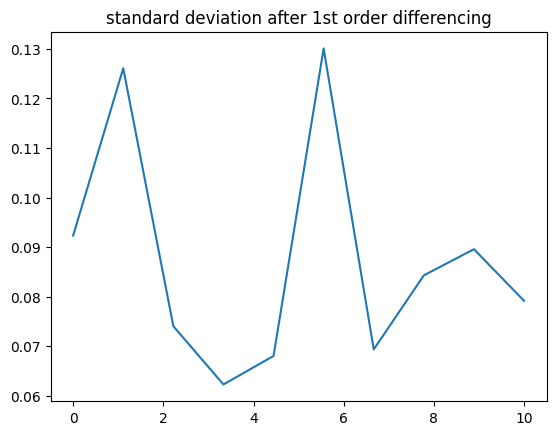

In [ ]:
k = np.array_split(res,10)
mu1 = []
sigma2 = []
for j in k:
  mu1_ = np.mean(j)
  mu1.append(mu1_)
  sigma2_ = np.std(j)
  sigma2.append(sigma2_)

x2 = np.linspace(0,10,10)
plt.plot(x2,mu1)
plt.title('mean after 1st order differencing')
plt.show()
plt.plot(x2,sigma2)
plt.title('standard deviation after 1st order differencing')
plt.show()

## STATIONARITY CHECK 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

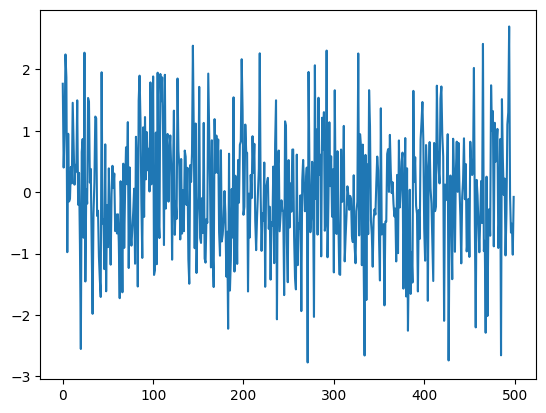

In [ ]:
data2 = np.genfromtxt('/content/stationary check 2 edited.txt')
a,b = data2[:,0],data2[:,1]
plt.plot(a,b)

# MJD FLUX

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.optimize import curve_fit
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data3 = pd.read_csv('/content/drive/MyDrive/NGC_1275_MJD_57000_59823.csv')

In [ ]:
x,y = data3['MJD'], data3['FLUX']

Text(0, 0.5, 'FLUX')

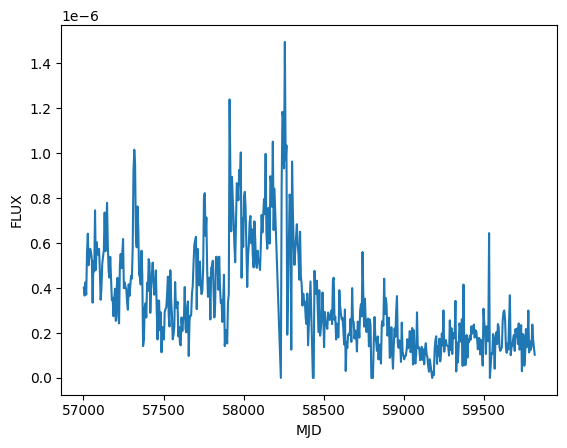

In [ ]:
plt.plot(x,y)
plt.xlabel('MJD')
plt.ylabel('FLUX')

### Calculating mean and standard deviation

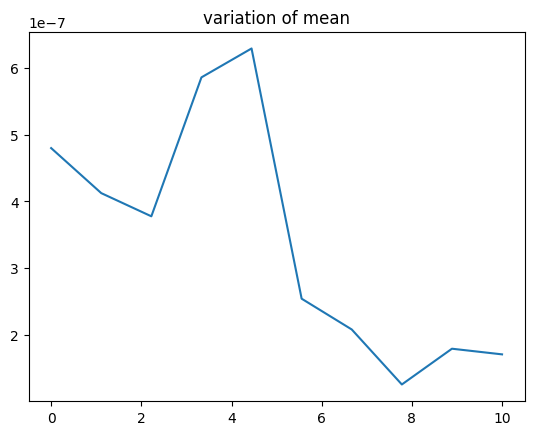

<function matplotlib.pyplot.show(close=None, block=None)>

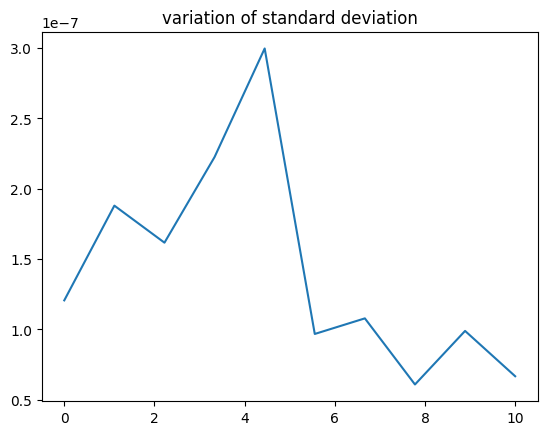

In [ ]:
split = np.array_split(y,10)
MU = []
SD = []
for s in split:
  mu_=np.mean(s)
  MU.append(mu_)
  sd_=np.std(s)
  SD.append(sd_)

axis = np.linspace(0,10,10)
plt.plot(axis,MU)
plt.title('variation of mean')
plt.show()
plt.plot(axis,SD)
plt.title('variation of standard deviation')
plt.show


### Curve fit

In [ ]:
def f(x,m,c):
  return m*x+c

par,cov = curve_fit(f,x,y)
print(par)


[-1.54561731e-10  9.37046829e-06]


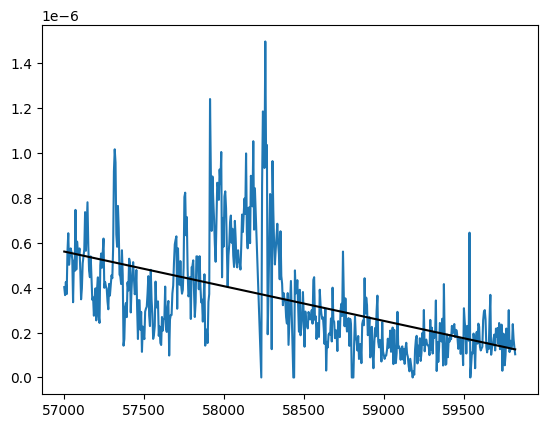

In [ ]:
bestfit = f(x,par[0],par[1])
plt.plot(x,y)
plt.plot(x,bestfit,'k')

### First order differencing

In [ ]:
fluxdiff = data3.diff(periods = 1,axis = 0)
data3['fluxdiff']=fluxdiff['FLUX'].fillna(0)
res2=data3['fluxdiff']
data3

,MJD,FLUX,fluxdiff
0,57002.500778,4.020363e-07,0.000000e+00
1,57007.500778,3.663023e-07,-3.573396e-08
2,57012.500778,4.248154e-07,5.851315e-08
3,57017.500778,3.707932e-07,-5.402227e-08
4,57022.500778,5.609029e-07,1.901097e-07
...,...,...,...
543,59797.500801,1.404272e-07,1.490884e-08
544,59802.500801,2.372277e-07,9.680051e-08
545,59807.500801,1.711493e-07,-6.607836e-08
546,59812.500801,1.344113e-07,-3.673804e-08


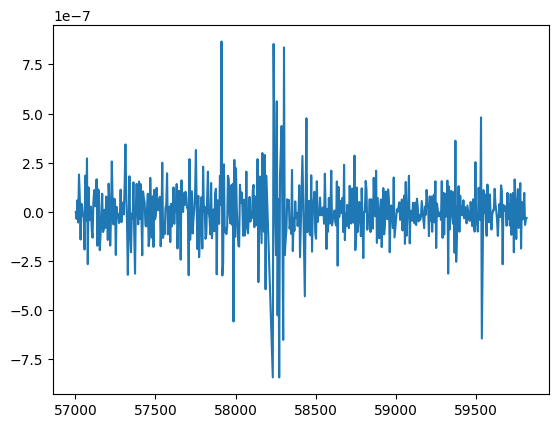

In [ ]:
plt.plot(x,res2)

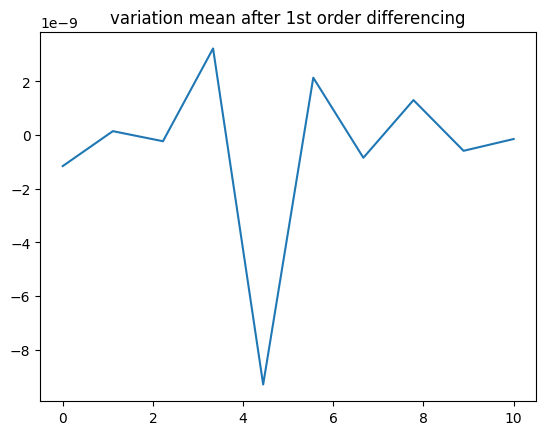

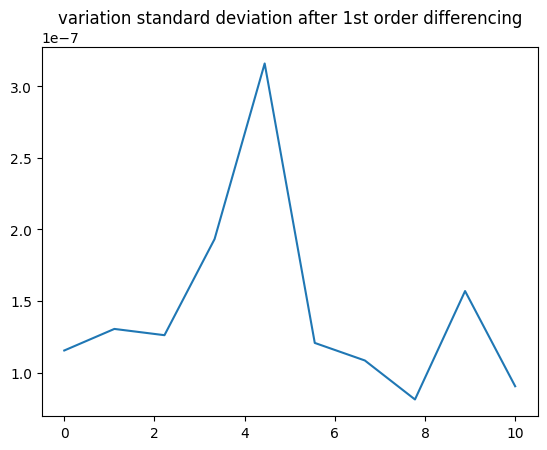

In [ ]:
split2 = np.array_split(res2,10)
MU2=[]
SD2=[]
for i in split2:
  mu2_=np.mean(i)
  MU2.append(mu2_)
  sd2_=np.std(i)
  SD2.append(sd2_)

axis=np.linspace(0,10,10)
plt.plot(axis,MU2)
plt.title('variation mean after 1st order differencing')
plt.show()
plt.plot(axis,SD2)
plt.title('variation standard deviation after 1st order differencing')
plt.show()